In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("covertype_csv.csv")

In [7]:
# determining the dimension of the data (number of instances)
print("The dimension of the data",data.shape)
print("THe number of instances ", data.shape[0])


The dimension of the data (581012, 55)
THe number of instances  581012


In [79]:
# number of attributes
data.shape[1]

55

In [81]:
# number of classes
print (data['class'].value_counts())

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64


In [4]:
# 6
# 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null float64
Aspect                                581012 non-null float64
Slope                                 581012 non-null float64
Horizontal_Distance_To_Hydrology      581012 non-null float64
Vertical_Distance_To_Hydrology        581012 non-null float64
Horizontal_Distance_To_Roadways       581012 non-null float64
Hillshade_9am                         581012 non-null float64
Hillshade_Noon                        581012 non-null float64
Hillshade_3pm                         581012 non-null float64
Horizontal_Distance_To_Fire_Points    581012 non-null float64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                   

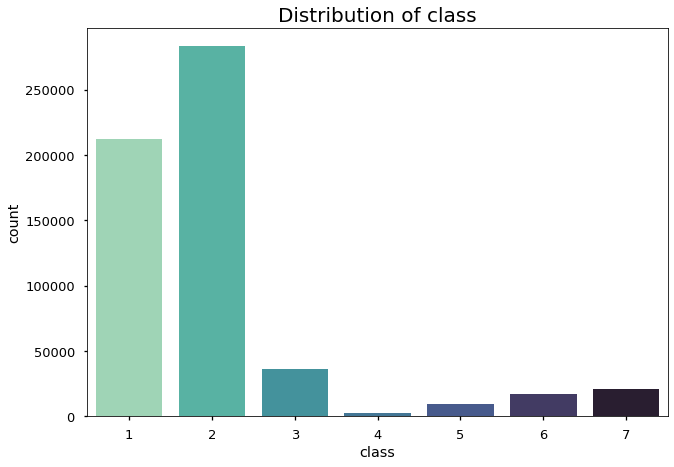

In [6]:

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(data['class'], palette = 'mako_r')
plt.title('Distribution of class', fontsize = 20)

plt.show()


In [7]:
# all variables summary
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213693,0.192862,0.283487,0.330216,0.835221,0.879208,0.561135,0.276076,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184608,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# DATA PREPROCESSING 

# 9. Checking quality issues 

In [8]:
# CHECKING PRESENCE OF MISSING VALUES
data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [4]:
# checking for duplicates
Rowduplicate = data[data.duplicated()]
print(Rowduplicate)

Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, class]
Index: []

[0 rows x 55 columns]


In [6]:
# Checking for any outlies
data.describe()
# there no outliers

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213693,0.192862,0.283487,0.330216,0.835221,0.879208,0.561135,0.276076,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184608,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# 10. convert class variable into binary


In [9]:
data["class"]= data['class'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null float64
Aspect                                581012 non-null float64
Slope                                 581012 non-null float64
Horizontal_Distance_To_Hydrology      581012 non-null float64
Vertical_Distance_To_Hydrology        581012 non-null float64
Horizontal_Distance_To_Roadways       581012 non-null float64
Hillshade_9am                         581012 non-null float64
Hillshade_Noon                        581012 non-null float64
Hillshade_3pm                         581012 non-null float64
Horizontal_Distance_To_Fire_Points    581012 non-null float64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                   

# 11. Feature selecton

In [10]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,5


In [12]:
# selecting all the numeric numbers
NumData=data.select_dtypes(include=[np.number])
print(NumData.shape)

(581012, 54)


In [17]:
# we want to select 3 most variables
model = LogisticRegression()
rfe = RFE(model, 3)
rfe = rfe.fit(NumData,data['class'])
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[ 1 52 14  6 11  4  1  1  2 10  5  9  8  3 18 16 15 13 26 39 36 51 35 38
 40 19 34 12 50 37 33 49 41 32 20 17 23 29 43 27 42 25 46 48 22 44 24 45
 30 47  7 28 21 31]


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null float64
Aspect                                581012 non-null float64
Slope                                 581012 non-null float64
Horizontal_Distance_To_Hydrology      581012 non-null float64
Vertical_Distance_To_Hydrology        581012 non-null float64
Horizontal_Distance_To_Roadways       581012 non-null float64
Hillshade_9am                         581012 non-null float64
Hillshade_Noon                        581012 non-null float64
Hillshade_3pm                         581012 non-null float64
Horizontal_Distance_To_Fire_Points    581012 non-null float64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                   

# 12. Partioning the data into training and testing 

In [25]:
X=data[['Elevation','Hillshade_9am','Hillshade_Noon']]
Y=data['class']
print("Top 5 of independent variables\n",X.head())
print("Top 5 of dependent variables\n",Y.head())
# partioning the training set to 80 % and testing to 20 %
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Top 5 of independent variables
    Elevation  Hillshade_9am  Hillshade_Noon
0   0.368684       0.870079        0.913386
1   0.365683       0.866142        0.925197
2   0.472736       0.921260        0.937008
3   0.463232       0.937008        0.937008
4   0.368184       0.866142        0.921260
Top 5 of independent variables
 0    5
1    5
2    2
3    2
4    5
Name: class, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]


# CLASSIFICATION AND EVALUATION

#1. Decision Tree

In [69]:
model = DecisionTreeClassifier()
# Fitting the Decision Tree
model = model.fit(X_train,Y_train)
# Creating a prediction
Y_pred = model.predict(X_test)
# Accuracy of the model
AccD1=metrics.accuracy_score(Y_test, Y_pred)*100
print ("Decision Tree Accuracy using 80 % training data:", AccD1.round(2), "%")
#confusion matrix
# f1, recall, support and precision

conMatrix = confusion_matrix(Y_test, Y_pred)
print ("Confusion Matrix of the Decision Tree\n", conMatrix)
print ("precision, recall, fi-score and support\n",classification_report(Y_test, Y_pred))
 

Decision Tree Accuracy using 80 % training data: 59.44 %
Confusion Matrix of the Decision Tree
 [[25363 14646    66     0   211    56  1870]
 [16578 36180  1524     8  1330   872   357]
 [   81  1437  3966   270    76  1264     0]
 [    0     5   289   191     0    84     0]
 [  225  1217    64     0   344    36     0]
 [   70   851  1259    88    34  1200     0]
 [ 1860   400     0     0     0     0  1831]]
precision, recall, fi-score and support
               precision    recall  f1-score   support

           1       0.57      0.60      0.59     42212
           2       0.66      0.64      0.65     56849
           3       0.55      0.56      0.56      7094
           4       0.34      0.34      0.34       569
           5       0.17      0.18      0.18      1886
           6       0.34      0.34      0.34      3502
           7       0.45      0.45      0.45      4091

    accuracy                           0.59    116203
   macro avg       0.44      0.44      0.44    116203
weigh

# 2. NEarest Neighboure (KNN)

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [56]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, Y_train)
KNN_prediction = KNN_model.predict(X_test)
conMatrix = confusion_matrix(Y_test, Y_pred)
KnnAcc =accuracy_score(KNN_prediction, Y_test)*100
print("KNN accuracy score: ",KnnAcc.round(2), "%")
print("Confusion matrix\n",conMatrix)
print(classification_report(KNN_prediction, Y_test))

KNN accuracy score:  66.72 %
Confusion matrix
 [[25398 14598    60     0   213    56  1887]
 [16573 36177  1519    10  1328   876   366]
 [   89  1422  3962   283    85  1253     0]
 [    0     6   292   188     0    83     0]
 [  223  1220    58     0   352    32     1]
 [   72   853  1252    91    33  1201     0]
 [ 1862   409     0     0     0     0  1820]]
              precision    recall  f1-score   support

           1       0.65      0.64      0.65     42555
           2       0.75      0.70      0.72     60491
           3       0.64      0.63      0.64      7199
           4       0.31      0.47      0.37       371
           5       0.11      0.38      0.17       536
           6       0.31      0.49      0.38      2214
           7       0.42      0.61      0.50      2837

    accuracy                           0.67    116203
   macro avg       0.45      0.56      0.49    116203
weighted avg       0.68      0.67      0.67    116203



# 3. Random forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model=model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)



In [70]:
# Accuracy of the model
RndAcc=metrics.accuracy_score(Y_test, Y_pred)*100
print ("Decision Tree Accuracy using 80 % training data:", RndAcc.round(2), "%")
#confusion matrix
# f1, recall, support and precision

conMatrix = confusion_matrix(Y_test, Y_pred)
print ("Confusion Matrix of the Decision Tree\n", conMatrix)
print ("precision, recall, fi-score and support\n",classification_report(Y_test, Y_pred))

Decision Tree Accuracy using 80 % training data: 59.44 %
Confusion Matrix of the Decision Tree
 [[25363 14646    66     0   211    56  1870]
 [16578 36180  1524     8  1330   872   357]
 [   81  1437  3966   270    76  1264     0]
 [    0     5   289   191     0    84     0]
 [  225  1217    64     0   344    36     0]
 [   70   851  1259    88    34  1200     0]
 [ 1860   400     0     0     0     0  1831]]
precision, recall, fi-score and support
               precision    recall  f1-score   support

           1       0.57      0.60      0.59     42212
           2       0.66      0.64      0.65     56849
           3       0.55      0.56      0.56      7094
           4       0.34      0.34      0.34       569
           5       0.17      0.18      0.18      1886
           6       0.34      0.34      0.34      3502
           7       0.45      0.45      0.45      4091

    accuracy                           0.59    116203
   macro avg       0.44      0.44      0.44    116203
weigh

In [78]:
# Evaluation of the accurcy of the classifiers

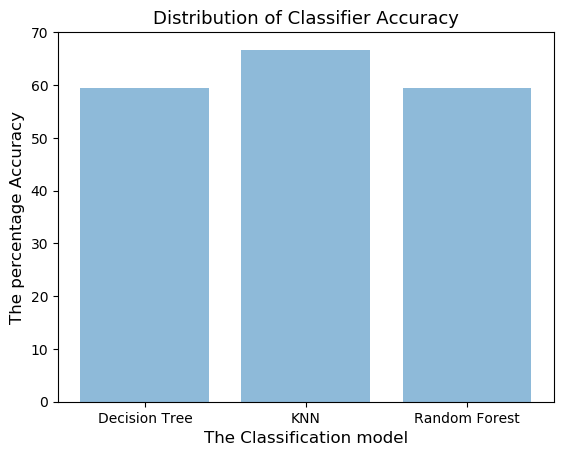

In [77]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Decision Tree', 'KNN', 'Random Forest')
y_pos = np.arange(len(objects))
performance = [AccD1,KnnAcc, RndAcc]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title("Distribution of Classifier Accuracy",fontsize=13)
plt.xlabel('The Classification model', fontsize=12)
plt.ylabel("The percentage Accuracy", fontsize=12)

plt.show()